In [2]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
def displaymd(mdstr):
    display(Markdown(mdstr))

In [3]:
geo_data = pd.read_csv('../data/geocodings.csv',index_col=0)
geo_data.shape

(254, 4)

In [4]:
geo_data.head()

,address,postal_code,lat,long
0,0048 Comox & Broughton,V6E4E1,49.285082,-123.134194
1,0002 Burrard Station,V6C0A4,49.285871,-123.121050
2,0093 Chilco & Robson,V6G1E8,49.293257,-123.138563
3,0035 Coal Harbour Community Centre,V6C3S3,49.290419,-123.125810
4,0071 14th & Granville,V6J2J4,49.259215,-123.142312


In [5]:
data_2020 = pd.read_csv('../data/Mobi_System_Data_2020.csv',compression='zip',index_col=0)
data_2020.shape

(572166, 14)

In [6]:
geo_data.rename({'lat':'dep_lat','long':'dep_long','postal_code':'dep_postal_code'},axis=1).head()

,address,dep_postal_code,dep_lat,dep_long
0,0048 Comox & Broughton,V6E4E1,49.285082,-123.134194
1,0002 Burrard Station,V6C0A4,49.285871,-123.121050
2,0093 Chilco & Robson,V6G1E8,49.293257,-123.138563
3,0035 Coal Harbour Community Centre,V6C3S3,49.290419,-123.125810
4,0071 14th & Granville,V6J2J4,49.259215,-123.142312


In [7]:
merge_2020 = data_2020.merge(geo_data.rename({'lat':'dep_lat','long':'dep_long','postal_code':'dep_postal_code'},axis=1),left_on='Departure station',right_on='address').drop('address',axis=1)
merge_2020 = merge_2020.merge(geo_data.rename({'lat':'return_lat','long':'return_long','postal_code':'return_postal_code'},axis=1),left_on='Return station',right_on='address').drop('address',axis=1)
merge_2020.shape

(571648, 20)

In [8]:
merge_2020.head()

,Departure,Return,Bike,Departure station,Return station,Membership type,Covered distance (m),Duration (sec.),Departure battery voltage (mV),Return battery voltage (mV),Departure temperature (C),Return temperature (C),Stopover duration (sec.),Number of stopovers,dep_postal_code,dep_lat,dep_long,return_postal_code,return_lat,return_long
0,2020-02-01 0:00,2020-02-01 0:00,522.0,0099 Vancouver Art Gallery - North Plaza,0196 Drake & Hornby,365 Plus,994.0,323,3881,4001,12,13,0,0,V6Z2H7,49.283227,-123.120523,V6Z0C5,49.277213,-123.129625
1,2020-01-31 18:00,2020-01-31 18:00,1027.0,0099 Vancouver Art Gallery - North Plaza,0196 Drake & Hornby,365 Day Founding Standard,982.0,338,3930,4048,13,14,0,0,V6Z2H7,49.283227,-123.120523,V6Z0C5,49.277213,-123.129625
2,2020-01-31 0:00,2020-01-31 0:00,1885.0,0099 Vancouver Art Gallery - North Plaza,0196 Drake & Hornby,365 Plus,988.0,307,3942,4064,8,9,0,0,V6Z2H7,49.283227,-123.120523,V6Z0C5,49.277213,-123.129625
3,2020-01-30 17:00,2020-01-30 17:00,491.0,0099 Vancouver Art Gallery - North Plaza,0196 Drake & Hornby,365 Corporate Standard,1051.0,332,4037,4121,11,13,0,0,V6Z2H7,49.283227,-123.120523,V6Z0C5,49.277213,-123.129625
4,2020-01-29 0:00,2020-01-29 0:00,1076.0,0099 Vancouver Art Gallery - North Plaza,0196 Drake & Hornby,365 Plus,990.0,329,3653,3803,9,10,0,0,V6Z2H7,49.283227,-123.120523,V6Z0C5,49.277213,-123.129625


In [20]:
merge_2020.nunique()

Departure                          8435
Return                             8440
Bike                               2053
Departure station                   221
Return station                      221
Membership type                      22
Covered distance (m)              10040
Duration (sec.)                   13180
Departure battery voltage (mV)      772
Return battery voltage (mV)         798
Departure temperature (C)            57
Return temperature (C)               57
Stopover duration (sec.)           3631
Number of stopovers                  14
dep_postal_code                     191
dep_lat                             209
dep_long                            209
return_postal_code                  191
return_lat                          209
return_long                         209
dtype: int64

In [21]:
merge_2020.isnull().sum()

Departure                          0
Return                             0
Bike                              43
Departure station                  0
Return station                     0
Membership type                   33
Covered distance (m)               0
Duration (sec.)                    0
Departure battery voltage (mV)     0
Return battery voltage (mV)        0
Departure temperature (C)          0
Return temperature (C)             0
Stopover duration (sec.)           0
Number of stopovers                0
dep_postal_code                    0
dep_lat                            0
dep_long                           0
return_postal_code                 0
return_lat                         0
return_long                        0
dtype: int64

In [9]:
# drop Na
merge_2020 = merge_2020.dropna()
merge_2020.shape

(571572, 20)

In [10]:
v6 = merge_2020[merge_2020['return_postal_code'].str.startswith('V6')]
v6 = v6[v6['dep_postal_code'].str.startswith('V6')]
v6.shape

(363749, 20)

In [11]:
v6.nunique()

Departure                          8216
Return                             8233
Bike                               2052
Departure station                   128
Return station                      128
Membership type                      22
Covered distance (m)               9470
Duration (sec.)                   11464
Departure battery voltage (mV)      743
Return battery voltage (mV)         776
Departure temperature (C)            54
Return temperature (C)               54
Stopover duration (sec.)           3014
Number of stopovers                  14
dep_postal_code                     106
dep_lat                             122
dep_long                            122
return_postal_code                  106
return_lat                          122
return_long                         122
dtype: int64

In [17]:
v5 = merge_2020.loc[(merge_2020['return_postal_code'].str.startswith('V5')) | (merge_2020['return_postal_code'].str.startswith('V6'))]
v5 = v5[v5['dep_postal_code'].str.startswith('V5')]
v5.shape

(101738, 20)

In [18]:
v5v6 = v5.append(v6)
v5v6.shape

(465487, 20)

In [39]:
v5v6.nunique()

Departure                          8279
Return                             8304
Bike                               2052
Departure station                   203
Return station                      203
Membership type                      22
Covered distance (m)               9699
Duration (sec.)                   12037
Departure battery voltage (mV)      754
Return battery voltage (mV)         790
Departure temperature (C)            55
Return temperature (C)               55
Stopover duration (sec.)           3278
Number of stopovers                  14
dep_postal_code                     173
dep_lat                             191
dep_long                            191
return_postal_code                  173
return_lat                          191
return_long                         191
dtype: int64

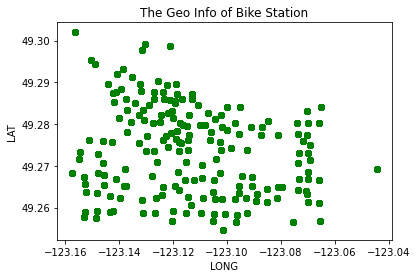

In [53]:
# return station and departure station are the same basically
plt.scatter(v5v6['return_long'], v5v6['return_lat'], c='g')
#plt.scatter(v5v6['dep_long'], v5v6['dep_lat'], c='g',)
plt.xlabel("LONG")
plt.ylabel("LAT")
plt.title('The Geo Info of Bike Station')
plt.show()

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [22]:
v5v6['features'] = v5v6['return_long'].apply(lambda x : [x]) + v5v6['return_lat'].apply(lambda x : [x])
v5v6.shape

(465487, 21)

In [23]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(list(v5v6.features))

In [24]:
X = list(v5v6['features'])
kmeans = KMeans(n_clusters=3).fit(scaled_features)

In [25]:
df_kmeans_v5v6 = v5v6.copy()
df_kmeans_v5v6['label'] = kmeans.labels_

In [26]:
df_kmeans_v5v6['label'].value_counts()

0    190180
1    166224
2    109083
Name: label, dtype: int64

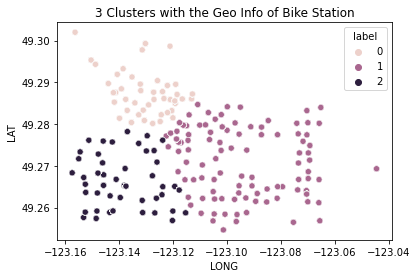

In [27]:
sns.scatterplot(x='return_long', y='return_lat', hue='label', data=df_kmeans_v5v6)
plt.xlabel("LONG")
plt.ylabel("LAT")
plt.title('3 Clusters with the Geo Info of Bike Station')
plt.show()

In [57]:
X = list(v5v6['features'])
kmeans = KMeans(n_clusters=5).fit(scaled_features)
df_kmeans_v5v6 = v5v6.copy()
df_kmeans_v5v6['label'] = kmeans.labels_
df_kmeans_v5v6['label'].value_counts()

4    106760
0    100514
2     89487
3     82711
1     34073
Name: label, dtype: int64

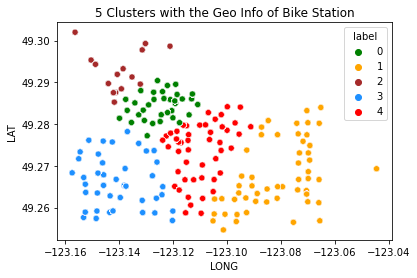

In [58]:
sns.scatterplot(x='return_long', y='return_lat', hue='label', data=df_kmeans_v5v6, palette=['green','orange','brown','dodgerblue','red'])
plt.xlabel("LONG")
plt.ylabel("LAT")
plt.title('5 Clusters with the Geo Info of Bike Station')
plt.show()

In [59]:
X = list(v5v6['features'])
kmeans = KMeans(n_clusters=8).fit(scaled_features)
df_kmeans_v5v6 = v5v6.copy()
df_kmeans_v5v6['label'] = kmeans.labels_
df_kmeans_v5v6['label'].value_counts()

0    81855
6    78445
1    72792
5    55410
2    50657
7    27187
3    25045
4    22154
Name: label, dtype: int64

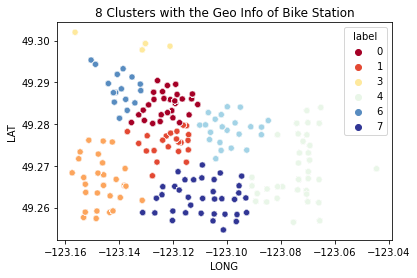

In [60]:
sns.scatterplot(x='return_long', y='return_lat', hue='label', data=df_kmeans_v5v6, 
                palette='RdYlBu')
plt.xlabel("LONG")
plt.ylabel("LAT")
plt.title('8 Clusters with the Geo Info of Bike Station')
plt.show()

## Choosing the appropriate number of K

In [ ]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
kmeans.fit(scaled_features)
sse.append(kmeans.inertia_)

## visualize the graph

In [30]:
import networkx as nx
import matplotlib.pyplot as plt 

In [31]:
stations=nx.Graph()

In [179]:
df_kmeans_v5v6['return_pos'] = df_kmeans_v5v6['return_long']+df_kmeans_v5v6['return_lat']
df_kmeans_v5v6['dep_pos'] = df_kmeans_v5v6['dep_long']+df_kmeans_v5v6['dep_lat']

In [181]:
df_kmeans_v5v6.groupby('return_pos')['dep_pos'].count()

return_pos
-73.895558    1205
-73.893667    1033
-73.891131     428
-73.889104    1969
-73.889078     676
              ... 
-73.789736     354
-73.787207     267
-73.785662     456
-73.781278    1076
-73.775308     639
Name: dep_pos, Length: 191, dtype: int64

In [180]:
node = df_kmeans_v5v6[['return_lat','return_long','return_postal_code','label','return_pos','dep_pos']].drop_duplicates()
node.nunique()

return_lat            191
return_long           191
return_postal_code    173
label                   3
return_pos            191
dep_pos               191
dtype: int64

In [ ]:
node.groupby('return_pos')['']

In [136]:
node['lat_long'] = node['return_lat'].apply(lambda x :[x]) + node['return_long'].apply(lambda x: [x])

In [137]:
c1 = node[node.label==0]
c2 = node[node.label==1]
c3 = node[node.label==2]

In [ ]:
nlist1 = []
for i in range(len(c1)):
    nlist1.append(i)
    stations.add_node(nlist1[i])

In [140]:
pos1 = dict(zip(nlist1,c1['lat_long']))
pos2 = dict(zip(c2['return_long'],c2['return_lat']))
pos3 = dict(zip(c3['return_long'],c3['return_lat']))

In [142]:
nlist1 = []
for i in range(len(c1)):
    nlist1.append(i)
    stations.add_node(nlist1[i])

/var/folders/2n/082nnsp112q6r95ps5ymmcr40000gn/T/ipykernel_62981/649841845.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([i+100 for i in range(1, 7)])


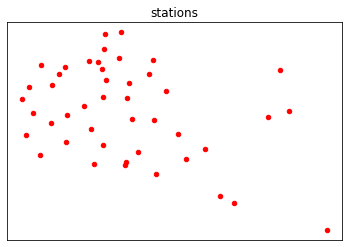

In [159]:
fig, ax = plt.subplots()
ax.set_title('stations')
ax.set_xticklabels([i+100 for i in range(1, 7)])
nx.draw_networkx_nodes(stations,pos1,nlist1,node_size=20,node_color='r',ax=ax)
#nx.draw_networkx_nodes(roads,npos,nnlist,node_size=20,node_color='g')
rlabels=dict(zip(nlist1,nlist1))
#nx.draw_networkx_labels(stations,pos1,rlabels,font_size=20)
plt.show()

In [40]:
node = df_kmeans_v5v6[['return_lat','return_long','return_postal_code','label']].drop_duplicates()
node.nunique()

return_lat            191
return_long           191
return_postal_code    173
label                   3
dtype: int64

In [38]:
node.drop_duplicates().shape

(191, 4)

In [37]:
node.groupby(['return_lat','return_long']).count()

,,return_postal_code,label
return_lat,return_long,,
49.254667,-123.101389,668,668
49.256496,-123.075426,757,757
49.256679,-123.096607,339,339
49.256825,-123.105234,709,709
49.256857,-123.065646,1199,1199
...,...,...,...
49.295340,-123.150433,9649,9649
49.297769,-123.131478,9608,9608
49.298657,-123.121176,8069,8069


In [168]:
v5v6.groupby(['Return station'])['Departure station'].count().sort_values().shape

(203,)

In [173]:
v5v6.head()

,Departure,Return,Bike,Departure station,Return station,Membership type,Covered distance (m),Duration (sec.),Departure battery voltage (mV),Return battery voltage (mV),...,Return temperature (C),Stopover duration (sec.),Number of stopovers,dep_postal_code,dep_lat,dep_long,return_postal_code,return_lat,return_long,features
367,2020-01-27 21:00,2020-01-27 22:00,1149.0,0074 10th & Main,0196 Drake & Hornby,365 Day Pass Plus SALE,4318.0,1721,3761,3918,...,6,573,1,V5T1Z2,49.262141,-123.101961,V6Z0C5,49.277213,-123.129625,"[-123.1296251, 49.277213]"
368,2020-08-23 15:00,2020-08-23 15:00,1631.0,0074 10th & Main,0196 Drake & Hornby,30 Day Pass,4380.0,1376,3932,4035,...,24,0,0,V5T1Z2,49.262141,-123.101961,V6Z0C5,49.277213,-123.129625,"[-123.1296251, 49.277213]"
735,2020-01-21 10:00,2020-01-21 11:00,2000.0,0134 14th & Main,0196 Drake & Hornby,365 Day Pass Standard SALE,4429.0,1089,3705,3852,...,12,0,0,V5T3G3,49.258425,-123.100792,V6Z0C5,49.277213,-123.129625,"[-123.1296251, 49.277213]"
736,2020-08-23 15:00,2020-08-23 15:00,1697.0,0134 14th & Main,0196 Drake & Hornby,365 Standard,4882.0,1872,3950,4061,...,24,0,0,V5T3G3,49.258425,-123.100792,V6Z0C5,49.277213,-123.129625,"[-123.1296251, 49.277213]"
1387,2020-08-14 20:00,2020-08-14 21:00,144.0,0191 7th & Laurel,0196 Drake & Hornby,24 Hour,4116.0,1450,4150,4263,...,23,0,0,V5Z4C1,49.265018,-123.123852,V6Z0C5,49.277213,-123.129625,"[-123.1296251, 49.277213]"


In [175]:
df_kmeans_v5v6.shape

(465487, 22)

In [177]:
v5v6['features'] = v5v6['features'].astype('str')

In [178]:
v5v6.nunique()

Departure                          8329
Return                             8349
Bike                               2052
Departure station                   203
Return station                      203
Membership type                      22
Covered distance (m)               9815
Duration (sec.)                   12397
Departure battery voltage (mV)      761
Return battery voltage (mV)         793
Departure temperature (C)            57
Return temperature (C)               56
Stopover duration (sec.)           3387
Number of stopovers                  14
dep_postal_code                     173
dep_lat                             191
dep_long                            191
return_postal_code                  173
return_lat                          191
return_long                         191
features                            191
dtype: int64